In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [11]:
dataset=pd.read_csv("/content/diabetes.csv")

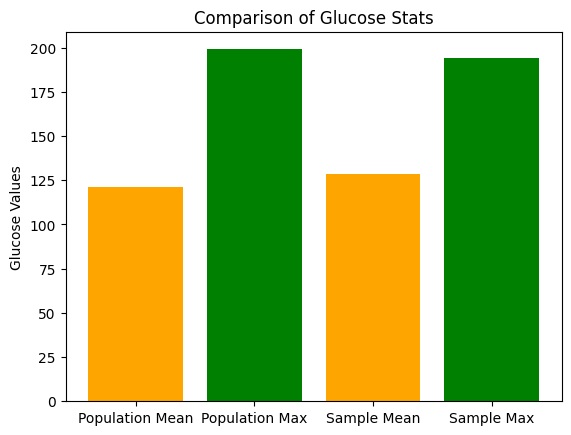

In [12]:

np.random.seed(798)


trial = dataset.sample(25)

pop_mean_glucose = dataset['Glucose'].mean()
pop_max_glucose = dataset['Glucose'].max()

trial_mean_glucose = trial['Glucose'].mean()
trial_max_glucose = trial['Glucose'].max()


# Create a bar chart for comparison
attribute = ['pop Mean', 'pop Max', 'Sample Mean', 'Sample Max']
values = [pop_mean_glucose, pop_max_glucose, trial_mean_glucose, trial_max_glucose]

plot.bar(attribute, values, color=['orange', 'green', 'orange', 'green'])
plot.title('Comparison of Glucose Stats')
plot.ylabel('Glucose Values')
plot.show()


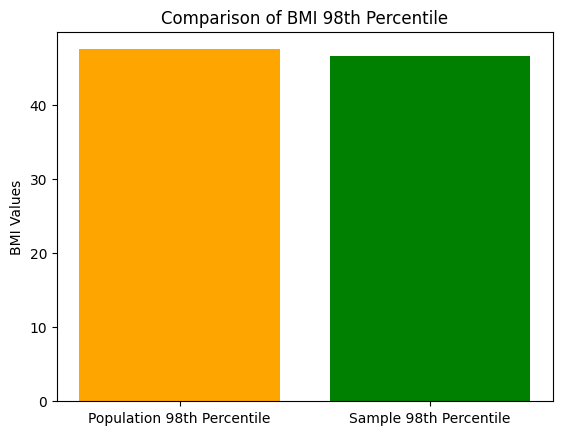

In [14]:
pop_percentage = np.percentile(dataset['BMI'], 98)
sample_percentage = np.percentile(trial['BMI'], 98)

attributes = ['pop 98th Percentile', 'Sample 98th Percentile']
values = [pop_percentage, sample_percentage]

plot.bar(attributes, values, color=['Orange', 'green'])
plot.title('Comparison of BMI 98th Percentile')
plot.ylabel('BMI Values')
plot.show()

In [15]:

btstrap_samples = 500
sample_size = 150


btstrap_mean = np.zeros(btstrap_samples)
btstrap_std_dev = np.zeros(btstrap_samples)
btstrap_percentile = np.zeros(btstrap_samples)


for i in range(btstrap_samples):
    btstrap_sample = dataset['BloodPressure'].sample(sample_size, replace=True)
    btstrap_mean[i] = btstrap_sample.mean()
    btstrap_std_dev[i] = btstrap_sample.std()
    btstrap_percentile[i] = np.percentile(btstrap_sample, 98)


pop_mean = dataset['BloodPressure'].mean()
pop_std_dev = dataset['BloodPressure'].std()
pop_percentile = np.percentile(dataset['BloodPressure'], 98)


bmean=np.mean(btstrap_mean)
bsd=np.mean(btstrap_std_dev)
bp=np.mean(btstrap_percentile)


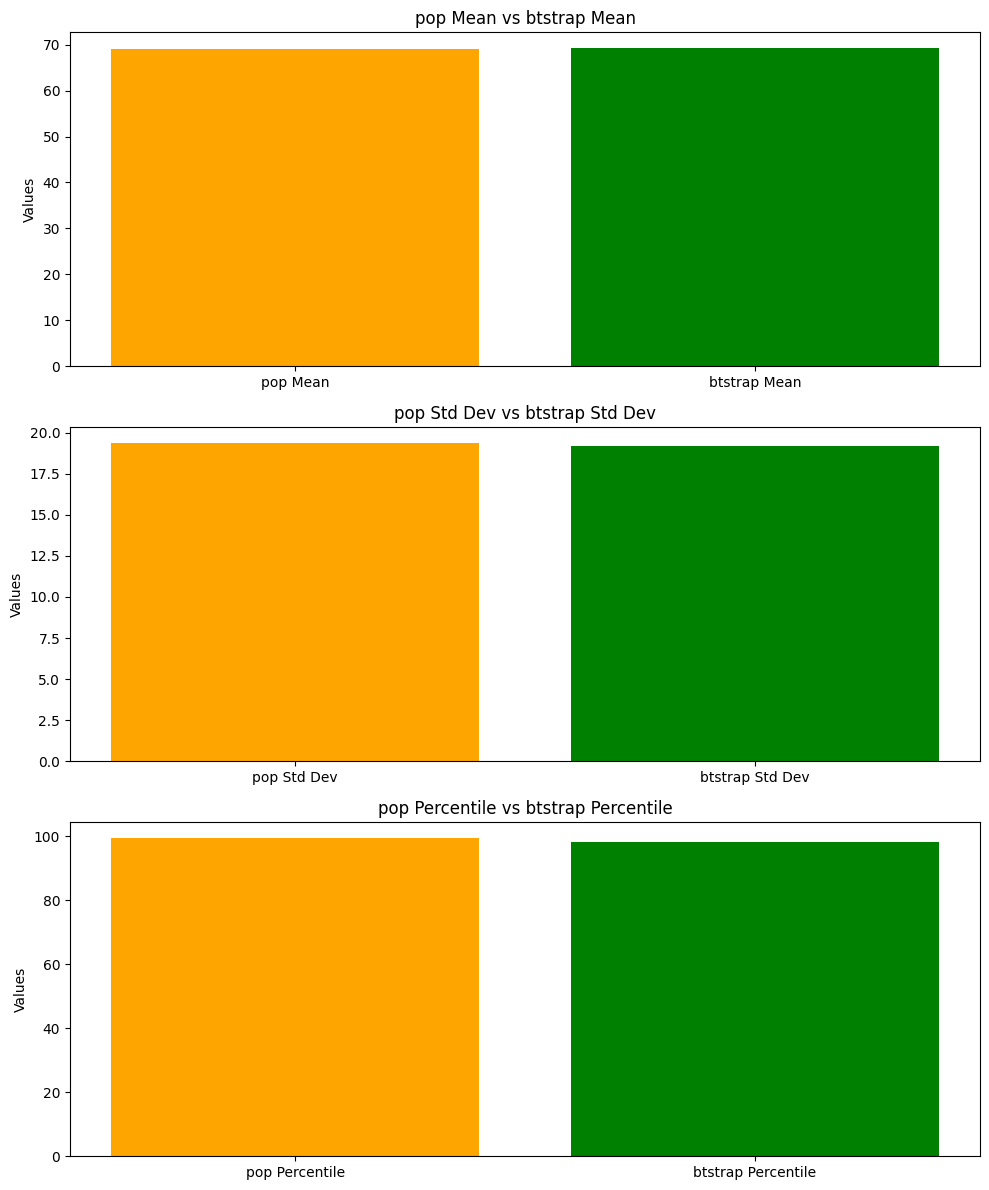

In [17]:
fig, axis = plot.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['pop Mean', 'btstrap Mean'], [pop_mean, bmean], color=['orange', 'green'])
axis[0].set_ylabel('Values')
axis[0].set_title('pop Mean vs btstrap Mean')


axis[1].bar(['pop Std Dev', 'btstrap Std Dev'], [pop_std_dev, bsd], color=['orange', 'green'])
axis[1].set_ylabel('Values')
axis[1].set_title('pop Std Dev vs btstrap Std Dev')


axis[2].bar(['pop Percentile', 'btstrap Percentile'], [pop_percentile, bp], color=['orange', 'green'])
axis[2].set_ylabel('Values')
axis[2].set_title('pop Percentile vs btstrap Percentile')

plot.tight_layout()
plot.show()